<a href="https://colab.research.google.com/github/tonykks/2024_mirae_master/blob/main/%EC%A0%9C%EC%A3%BC%EC%A7%80%EC%A0%90_1_%EC%97%B4%EB%8C%80%EC%95%BC_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# 1. 한글 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [1]:
# 2. 엑셀 파일 읽기를 위한 라이브러리 설치
!pip install pandas openpyxl

# 3. 필요한 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

# 4. matplotlib에서 한글을 사용할 수 있도록 설정
plt.rc('font', family='NanumGothic')

# 5. 엑셀 파일을 읽고 데이터프레임 생성
file_path = './df_jeju_final.xlsx'  # 업로드한 파일의 경로
df = pd.read_excel(file_path)

# 데이터프레임 확인
df.head()


,일시,지점,폭염,최고체감온도,최고기온,평균기온,최저기온,평균상대습도,폭염특보,폭염영향예보(단계),열대야,자외선지수
0,2019-05-01,제주(184),0,20.0,18.6,14.7,12.4,74.6,0,,0,높음
1,2019-05-02,제주(184),0,21.7,21.5,17.2,12.8,40.9,0,,0,매우높음
2,2019-05-03,제주(184),0,22.3,21.9,18.9,16.0,49.0,0,,0,매우높음
3,2019-05-04,제주(184),0,22.1,23.3,19.2,14.7,48.0,0,,0,매우높음
4,2019-05-05,제주(184),0,22.2,22.2,19.0,16.4,51.9,0,,0,높음


In [3]:
# '일시' 열을 이용해 연도와 월을 추출한 후, '열대야' 일수를 연도별로 월별 합계를 구하고,
# 각 연도별 총합계를 추가로 계산합니다.

# '일시' 열에서 연도와 월을 추출
df['연도'] = pd.to_datetime(df['일시']).dt.year
df['월'] = pd.to_datetime(df['일시']).dt.month

# '열대야' 열에서 월별 열대야 일수를 구하기 위해 그룹화
monthly_counts = df.groupby(['연도', '월'])['열대야'].sum().reset_index()

# 5월에서 9월까지 필터링 (원하는 월 범위)
monthly_counts = monthly_counts[monthly_counts['월'].isin([5, 6, 7, 8, 9])]

# 연도별 열대야 총합계 계산
yearly_sums = monthly_counts.groupby('연도')['열대야'].sum().reset_index()
yearly_sums['월'] = '합계'  # 합계 표시용

# 원래 데이터프레임에 연도별 합계 추가
final_data = pd.concat([monthly_counts, yearly_sums], ignore_index=True)

final_data

,연도,월,열대야
0,2019,5,0
1,2019,6,0
2,2019,7,9
3,2019,8,23
4,2019,9,2
5,2020,5,0
6,2020,6,0
7,2020,7,6
8,2020,8,30
9,2020,9,1


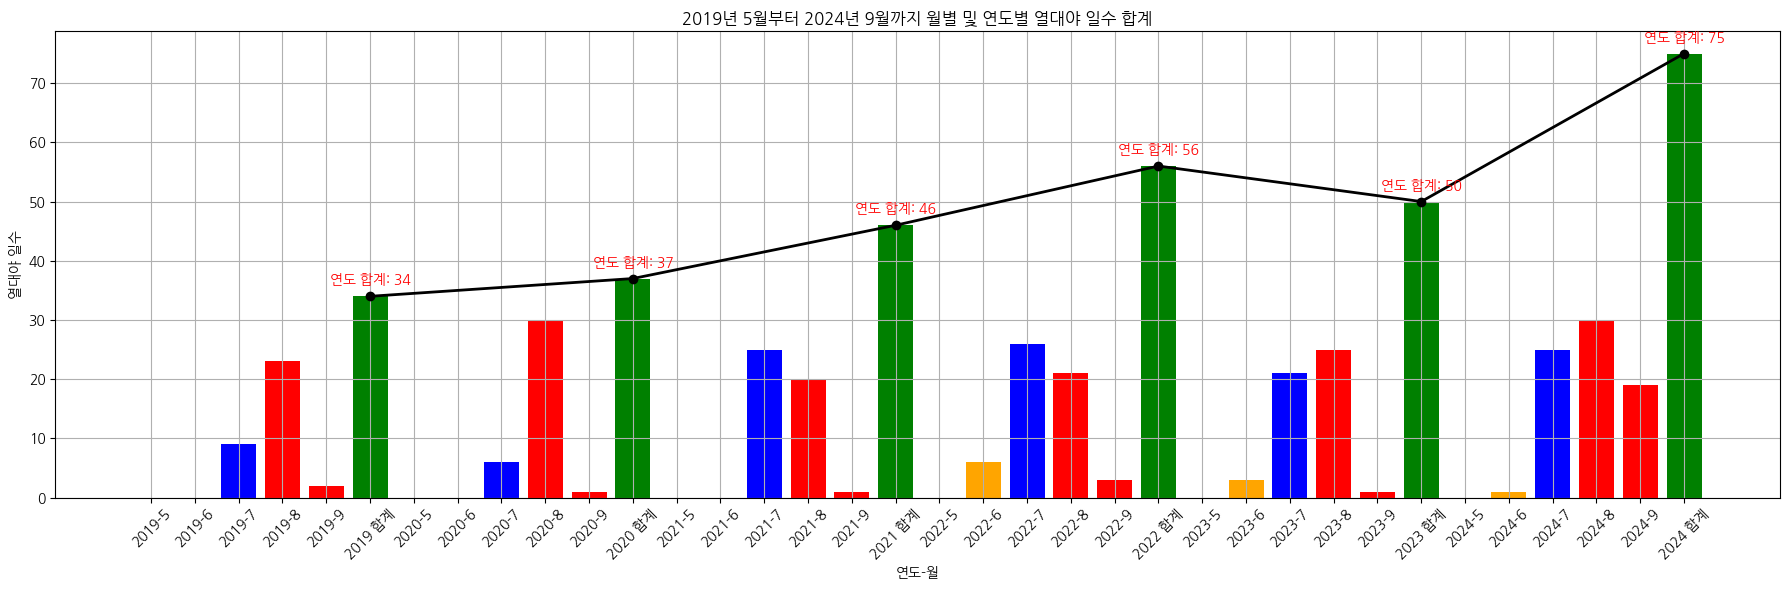

In [7]:
# 막대 그래프 위에 연도별 총합계 데이터를 꺾은선 그래프로 추가하여 그리기

# 그래프 그리기 설정
plt.figure(figsize=(18, 6))
colors = ['green', 'orange', 'blue', 'red']

# 각 연도의 5~9월과 연도별 총합계 열대야 일수를 막대 그래프로 그리기
for i, year in enumerate(final_data['연도'].unique()):
    data = final_data[final_data['연도'] == year]
    color_cycle = colors[:5] + ['red']  # 마지막 막대는 연도별 총합계를 위한 빨간색 지정
    bars = plt.bar(
        [f"{year}-{int(month)}" if month != '합계' else f"{year} 합계" for month in data['월']],
        data['열대야'],
        color=color_cycle
    )

    # 연도별 총합계 텍스트 표시
    total_sum = data[data['월'] == '합계']['열대야'].values
    if total_sum.size > 0:
        plt.text(len(data) - 1 + (i * 6), total_sum[0] + 2, f'연도 합계: {int(total_sum[0])}', color='red', ha='center')

# 연도별 총합계 데이터를 꺾은선 그래프로 추가
yearly_totals = yearly_sums['열대야'].values
plt.plot([f"{year} 합계" for year in yearly_sums['연도']], yearly_totals, marker='o', color='black', linestyle='-', linewidth=2)

# 그래프 제목 및 축 레이블 설정
plt.title('2019년 5월부터 2024년 9월까지 월별 및 연도별 열대야 일수 합계')
plt.xlabel('연도-월')
plt.ylabel('열대야 일수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()


위 그래프는 2019년부터 2024년까지 제주 지역의 열대야 일수를 연도별, 월별로 보여줍니다. 그래프에는 5월부터 9월까지의 월별 열대야 일수가 각각의 색으로 표시되어 있으며, 각 연도별 총 열대야 일수는 빨간색으로 강조된 막대 및 검은색 꺾은선으로 나타내어 비교됩니다.

### 분석 및 해석

1. **연도별 열대야 일수 증가 추세**
   - 그래프를 통해 연도별 총 열대야 일수가 꾸준히 증가하는 추세를 볼 수 있습니다. 특히 2019년부터 시작해 2024년까지 열대야 일수가 급격히 늘어나는 경향이 뚜렷하게 나타납니다.
   - 2019년의 총 열대야 일수는 34일로 시작되었으나, 2024년에는 75일로 크게 증가했습니다. 이는 약 5년간 열대야 일수가 2배 이상 늘어난 것을 의미하며, 최근의 온난화 추세가 열대야 발생 빈도에 큰 영향을 주고 있음을 시사합니다.

2. **여름철 열대야 집중 현상**
   - 열대야 일수는 여름철인 7월부터 9월 사이에 집중적으로 발생하고 있습니다. 특히, 7월과 8월의 열대야 일수가 두드러지며, 이는 기온 상승이 여름철에 집중된다는 기존 기후 변화 연구와 일치합니다.
   - 연도별로 5월과 6월에 발생한 열대야 일수도 조금씩 증가하는 추세를 보이는데, 이는 열대야가 여름뿐만 아니라 더 이른 시기에 발생하고 있음을 암시합니다. 이는 여름이 길어지고 있다는 기후 변화의 신호로도 해석할 수 있습니다.

3. **연도별 총합계 증가 경향**
   - 그래프에서 검은색 꺾은선이 나타내는 연도별 총합계는 2020년과 2023년을 제외하고는 꾸준히 증가하는 추세를 보입니다. 특히 2022년과 2024년에 급격한 증가가 나타나고 있습니다. 이는 특정 해에 폭염이 더 심해지거나 열대야가 발생할 확률이 높아진 경우를 반영할 수 있습니다.
   - 2023년에는 일시적으로 총 열대야 일수가 감소했지만, 2024년에 다시 증가하여 최고치를 기록합니다. 이는 일시적인 기후 변동이 있을 수 있지만, 전반적인 증가 추세에는 큰 영향을 미치지 않는다는 것을 의미할 수 있습니다.

### 가설 검증

"온실효과의 영향으로 최근 열대야 일수가 급격하게 늘어나고 있다"는 가설을 세웠을 때, 위의 데이터는 이를 뒷받침하는 증거로 작용할 수 있습니다. 매년 열대야 일수가 눈에 띄게 증가하고 있으며, 여름철 열대야의 강도와 빈도가 높아지고 있다는 점에서 온실효과로 인한 기후 변화의 영향이 반영된 것으로 해석됩니다. 특히, 온난화가 여름철 평균 기온을 높이고, 열대야가 더 오랜 기간 지속되도록 하는 효과가 있음을 시사하는 자료로 활용될 수 있습니다.

### 추가 데이터 분석 제안

- **기온 변화 데이터와의 연관성 분석**: 열대야 일수 증가가 실제로 평균 기온 상승과 상관관계가 있는지를 확인하기 위해 연도별, 월별 평균 기온 데이터와 비교 분석을 수행할 수 있습니다.
- **열대야 발생 패턴 변화**: 연도별로 열대야가 발생하는 시기(월)의 변화를 분석하여 여름철이 점점 길어지고 있는지를 확인할 수 있습니다.
- **지역 간 비교**: 제주 외의 다른 지역과 열대야 일수 증가 추이를 비교하여 온실효과가 지역별로 미치는 영향을 분석할 수 있습니다.

위와 같은 추가 분석을 통해 열대야 증가의 원인을 더욱 명확히 규명하고 온실효과와의 연관성을 강화할 수 있습니다.